In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

In [64]:
df = pd.read_csv("../data/laptop_prices_preprocessed.csv")

In [65]:
# Mostrar los primeros 5 registros del DataFrame
print("Primeros 5 registros del DataFrame:")
df.head()

Primeros 5 registros del DataFrame:


,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Company_Apple,...,CPU_company_Samsung,PrimaryStorageType_HDD,PrimaryStorageType_Hybrid,PrimaryStorageType_SSD,SecondaryStorageType_Hybrid,SecondaryStorageType_No,SecondaryStorageType_SSD,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia
0,13.3,8.0,1.37,1339.69,2560.0,1600.0,2.3,128.0,0.0,True,...,False,False,False,True,False,True,False,False,True,False
1,13.3,8.0,1.34,898.94,1440.0,900.0,1.8,128.0,0.0,True,...,False,False,False,False,False,True,False,False,True,False
2,15.6,8.0,1.86,575.00,1920.0,1080.0,2.5,256.0,0.0,False,...,False,False,False,True,False,True,False,False,True,False
3,15.4,16.0,1.83,2537.45,2880.0,1800.0,2.7,512.0,0.0,True,...,False,False,False,True,False,True,False,False,False,False
4,13.3,8.0,1.37,1803.60,2560.0,1600.0,3.1,256.0,0.0,True,...,False,False,False,True,False,True,False,False,True,False


In [66]:
# Mostrar información del DataFrame
print("Información del DataFrame:")
df.info()

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Inches                       1275 non-null   float64
 1   Ram                          1275 non-null   float64
 2   Weight                       1275 non-null   float64
 3   Price_euros                  1275 non-null   float64
 4   ScreenW                      1275 non-null   float64
 5   ScreenH                      1275 non-null   float64
 6   CPU_freq                     1275 non-null   float64
 7   PrimaryStorage               1275 non-null   float64
 8   SecondaryStorage             1275 non-null   float64
 9   Company_Apple                1275 non-null   bool   
 10  Company_Asus                 1275 non-null   bool   
 11  Company_Chuwi                1275 non-null   bool   
 12  Company_Dell                 1275 non-null   bool

In [67]:
# Mostrar los tipos de datos
print("Tipos de datos en cada columna:")
print(df.dtypes)

Tipos de datos en cada columna:
Inches                         float64
Ram                            float64
Weight                         float64
Price_euros                    float64
ScreenW                        float64
ScreenH                        float64
CPU_freq                       float64
PrimaryStorage                 float64
SecondaryStorage               float64
Company_Apple                     bool
Company_Asus                      bool
Company_Chuwi                     bool
Company_Dell                      bool
Company_Fujitsu                   bool
Company_Google                    bool
Company_HP                        bool
Company_Huawei                    bool
Company_LG                        bool
Company_Lenovo                    bool
Company_MSI                       bool
Company_Mediacom                  bool
Company_Microsoft                 bool
Company_Razer                     bool
Company_Samsung                   bool
Company_Toshiba                 

In [68]:
# Mostrar estadísticas descriptivas generales
print("Estadísticas descriptivas generales:")
df.describe()

Estadísticas descriptivas generales:


,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [69]:
# Preparación de los datos

# Separar variables predictoras y variable objetivo
X = df.drop('Price_euros', axis=1)
y = df['Price_euros']

# Conjunto de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las variables predictoras
scaler = StandardScaler()

numeric_cols = ['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Mostrar las formas de los conjuntos resultantes
print(f"Datos de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Datos de prueba: {X_test.shape}, {y_test.shape}")

Datos de entrenamiento: (1020, 56), (1020,)
Datos de prueba: (255, 56), (255,)


In [70]:
# Regresión lineal
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluación del modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Imprimir resultados
print(f"Error Cuadrático Medio: {mean_squared_error(y_test, y_pred_lr)}")
print(f"R²: {r2_score(y_test, y_pred_lr)}")

Error Cuadrático Medio: 116404.71720365706
R²: 0.7654734913785265


In [71]:
# Visualización de resultados
df_pred_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr, 'Error': y_test - y_pred_lr}) 
df_pred_lr 

,Actual,Predicted,Error
1179,650.0,603.350036,46.649964
342,716.0,985.170561,-269.170561
649,1584.0,1497.196443,86.803557
772,1020.0,791.862889,228.137111
803,1749.0,1494.645073,254.354927
...,...,...,...
701,399.0,614.410502,-215.410502
1105,1413.1,1687.674576,-274.574576
424,2799.0,2632.268739,166.731261
944,1299.0,1119.894832,179.105168


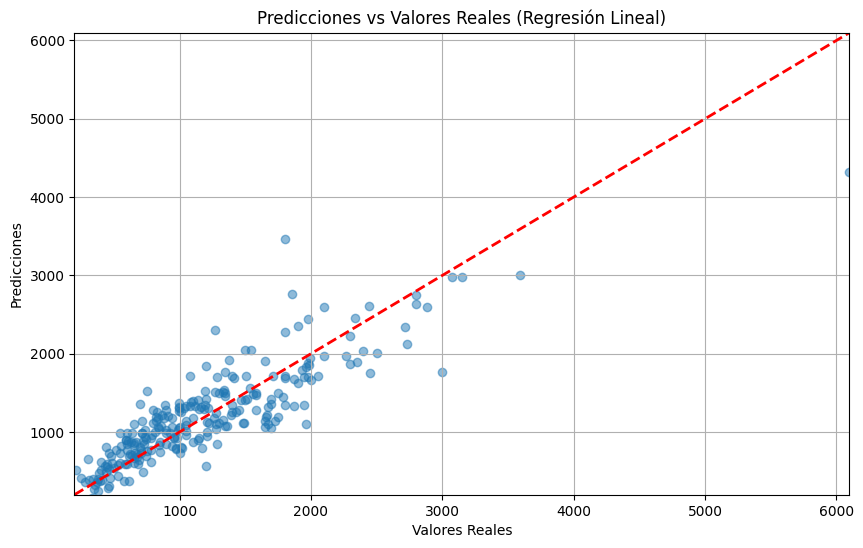

In [72]:
# Grafica de predicciones vs valores reales para regresión lineal
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicciones vs Valores Reales (Regresión Lineal)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

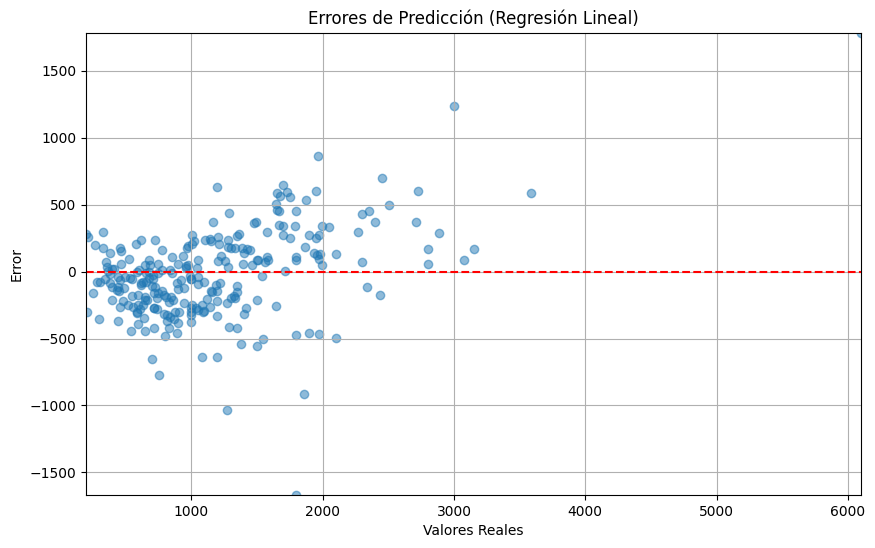

In [73]:
# Grafica de errores para regresión lineal
plt.figure(figsize=(10, 6))
plt.scatter(y_test, df_pred_lr['Error'], alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title('Errores de Predicción (Regresión Lineal)')
plt.xlabel('Valores Reales')
plt.ylabel('Error')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(df_pred_lr['Error'].min(), df_pred_lr['Error'].max())
plt.grid()
plt.show()

In [74]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluación del modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Imprimir resultados
print(f"Error Cuadrático Medio: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R²: {r2_score(y_test, y_pred_rf)}")

Error Cuadrático Medio: 74814.16893884137
R²: 0.8492680858805237


In [75]:
# Visualización de resultados
df_pred_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf, 'Error': y_test - y_pred_rf})
df_pred_rf

,Actual,Predicted,Error
1179,650.0,866.129875,-216.129875
342,716.0,870.921900,-154.921900
649,1584.0,1661.305100,-77.305100
772,1020.0,730.499600,289.500400
803,1749.0,1667.600200,81.399800
...,...,...,...
701,399.0,457.176500,-58.176500
1105,1413.1,1350.369400,62.730600
424,2799.0,2936.749407,-137.749407
944,1299.0,1434.034750,-135.034750


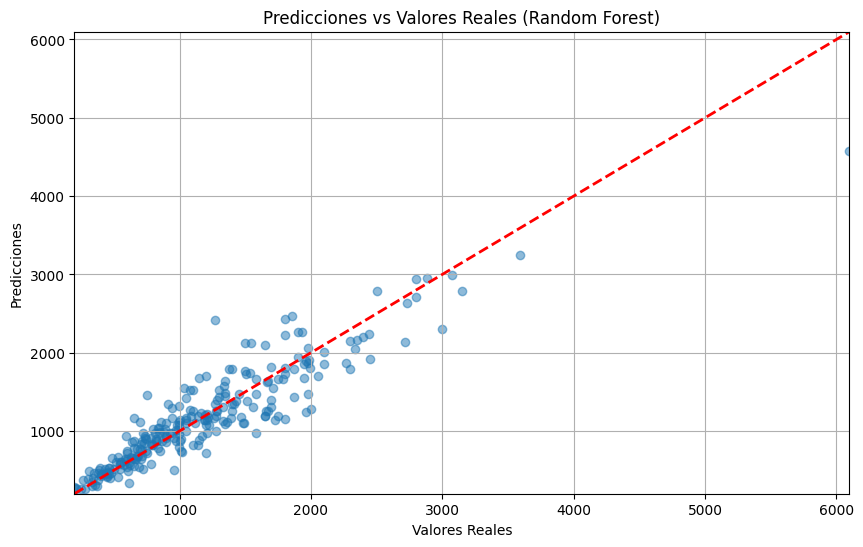

In [76]:
# Grafica de predicciones vs valores reales para Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicciones vs Valores Reales (Random Forest)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

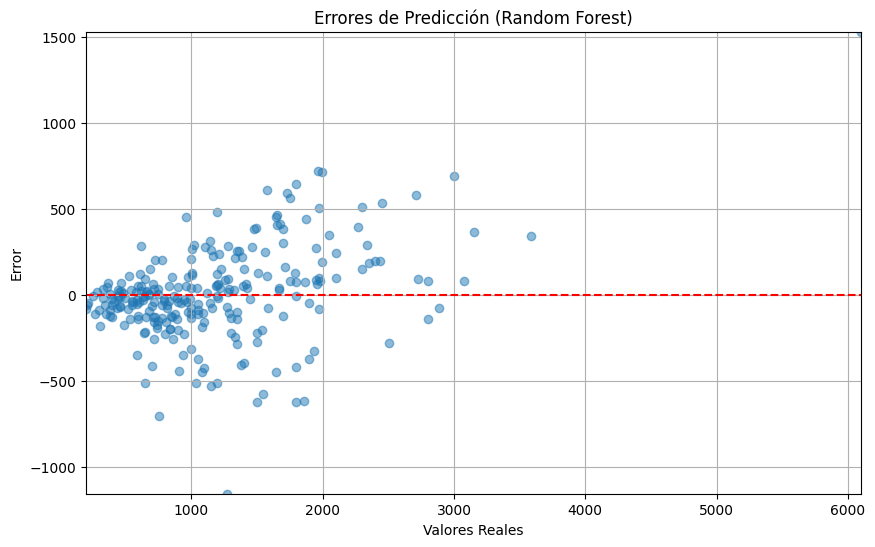

In [77]:
# Grafica de errores para random forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, df_pred_rf['Error'], alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title('Errores de Predicción (Random Forest)')
plt.xlabel('Valores Reales')
plt.ylabel('Error')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(df_pred_rf['Error'].min(), df_pred_rf['Error'].max())
plt.grid()
plt.show()

In [84]:
# Redes Neuronales
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', learning_rate_init=0.01, max_iter=1000)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# Evaluación del modelo
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

# Imprimir resultados
print(f"Error Cuadrático Medio: {mean_squared_error(y_test, y_pred_mlp)}")
print(f"R²: {r2_score(y_test, y_pred_mlp)}")

Error Cuadrático Medio: 98462.61425642202
R²: 0.8016223594195021


In [85]:
# Visualización de resultados
df_pred_mlp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_mlp, 'Error': y_test - y_pred_mlp})
df_pred_mlp

,Actual,Predicted,Error
1179,650.0,701.025938,-51.025938
342,716.0,823.456963,-107.456963
649,1584.0,1536.251139,47.748861
772,1020.0,648.042544,371.957456
803,1749.0,1517.358865,231.641135
...,...,...,...
701,399.0,497.935823,-98.935823
1105,1413.1,1461.701844,-48.601844
424,2799.0,2747.011295,51.988705
944,1299.0,1254.070771,44.929229


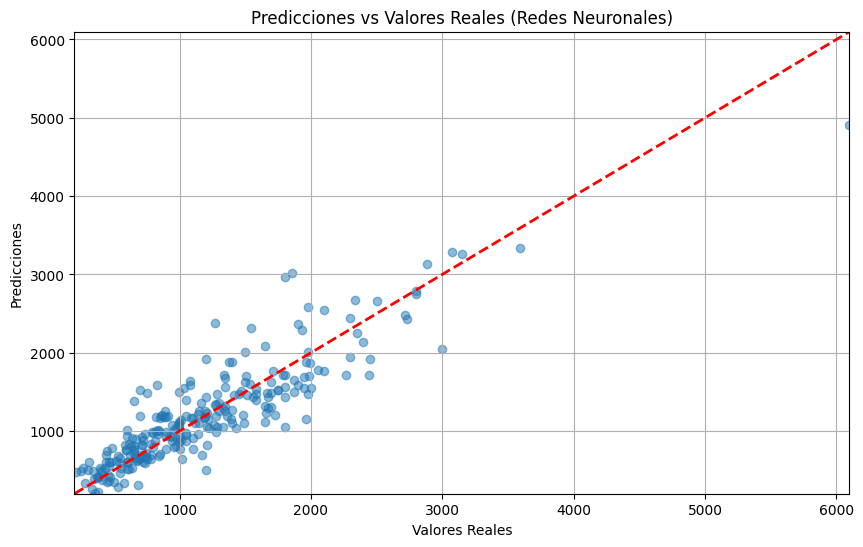

In [86]:
# Grafica de predicciones vs valores reales para MLP Redes Neuronales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_mlp, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicciones vs Valores Reales (Redes Neuronales)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

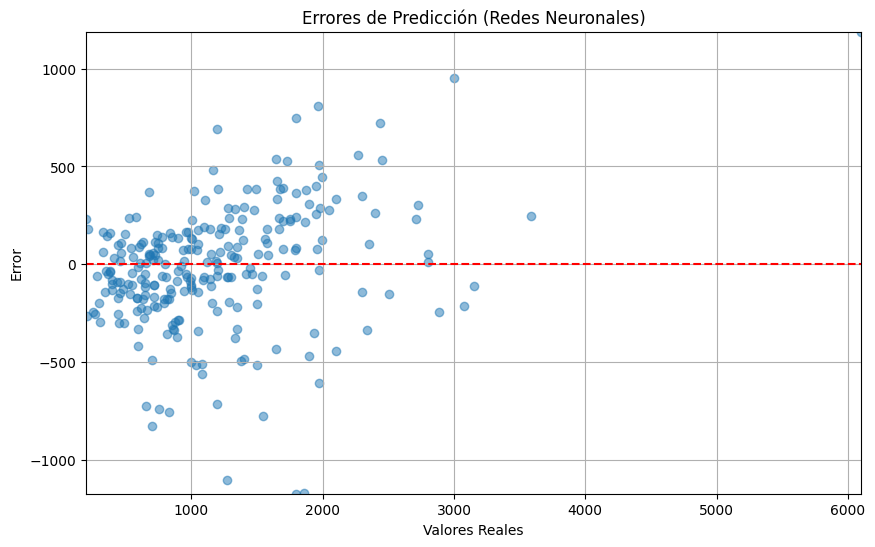

In [87]:
# Grafica de errores para MLP Redes Neuronales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, df_pred_mlp['Error'], alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title('Errores de Predicción (Redes Neuronales)')
plt.xlabel('Valores Reales')
plt.ylabel('Error')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(df_pred_mlp['Error'].min(), df_pred_mlp['Error'].max())
plt.grid()
plt.show()

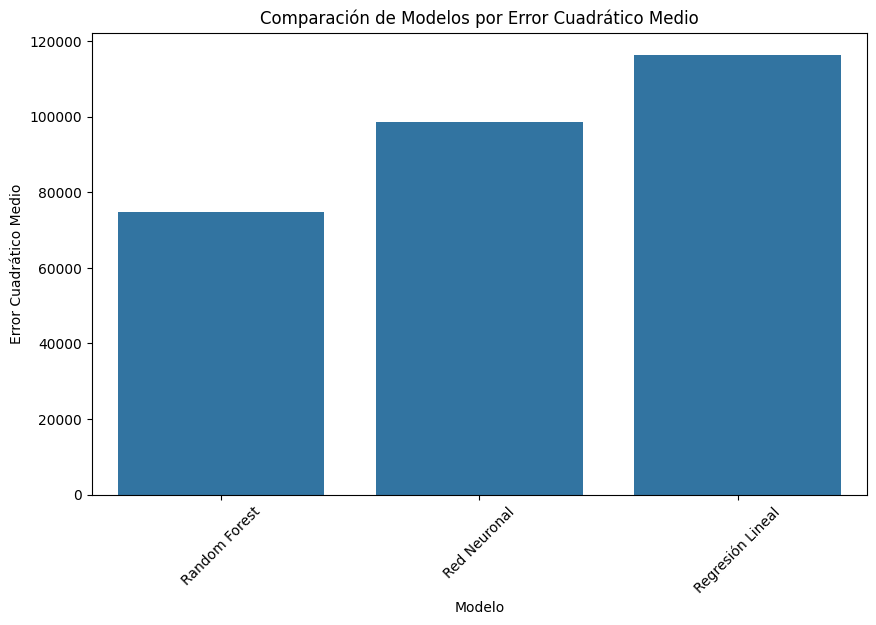

In [88]:
# Comparación de modelos regresion lineal, random forest y red neuronal por error cuadrático medio
mse = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest', 'Red Neuronal'],
    'MSE': [mse_lr, mse_rf, mse_mlp]
})
mse = mse.sort_values(by='MSE', ascending=True)
plt.figure(figsize=(10, 6))
sns.barplot(data=mse, x='Modelo', y='MSE')
plt.title('Comparación de Modelos por Error Cuadrático Medio')
plt.ylabel('Error Cuadrático Medio')
plt.xlabel('Modelo')
plt.xticks(rotation=45)
plt.show()

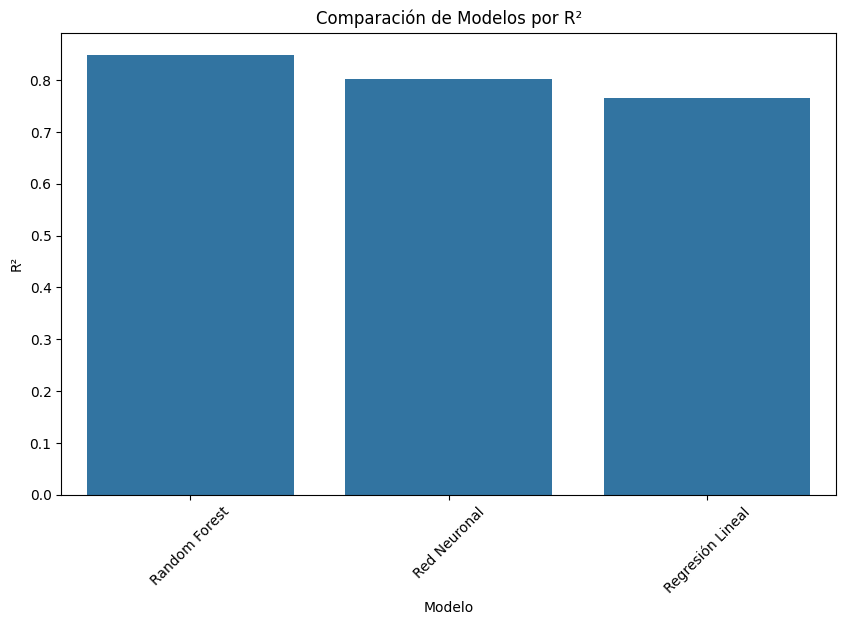

In [89]:
# Comparacion de modelos regresion lineal, random forest y red neuronal por R²
r2 = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest', 'Red Neuronal'],
    'R²': [r2_lr, r2_rf, r2_mlp]
})
r2 = r2.sort_values(by='R²', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=r2, x='Modelo', y='R²')
plt.title('Comparación de Modelos por R²')
plt.ylabel('R²')
plt.xlabel('Modelo')
plt.xticks(rotation=45)
plt.show()